In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from scipy.integrate import solve_ivp
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer


# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16

# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [8]:
def cAMP_PDEpt_tQSSA(t, x):
    cAMP, PDEpt = x

    numerator1 = cAMP * r1 * (-0.5 * Km2 + 0.5 * W0) + (-0.5 * cAMP * r1 - 0.5 * cAMP * r2 - 0.5 * Km1 * r2 - 0.5 * r2 * W0) * Dt
    denominator1 = cAMP * r1 - 1. * r2 * Dt

    numerator2 = cAMP ** 2 * r1 ** 2 * (Km2 ** 2 + 2. * Km2 * W0 + W0 ** 2) + cAMP * r1 * (cAMP * (2. * Km2 * r1 + 2. * Km2 * r2 + 2. * r1 * W0 - 2. * r2 * W0) + r2 * (2. * Km1 * Km2 - 2. * Km1 * W0 - 2. * Km2 * W0 - 2. * W0 ** 2)) * Dt + (cAMP ** 2 * (r1 ** 2 + 2. * r1 * r2 + r2 ** 2) + cAMP * r2 * (2. * Km1 * r1 + 2. * Km1 * r2 - 2. * r1 * W0 + 2. * r2 * W0) + r2 ** 2 * (Km1 ** 2 + 2. * Km1 * W0 + W0 ** 2)) * Dt ** 2
    denominator2 = (cAMP * r1 - 1. * r2 * Dt) ** 2
    ACpt = numerator1 / denominator1 - 0.5 * np.sqrt(numerator2 / denominator2)


    dcAMP = k1 * W0 * ACpt - (k2*PDEpt + k3) * cAMP
    dPDEpt = r3 * cAMP * ((W1 - PDEpt) / Km3 + cAMP + (W1 - PDEpt)) - r4 * Et * PDEpt / (Km4 + PDEpt + Et)

    return [dcAMP, dPDEpt]

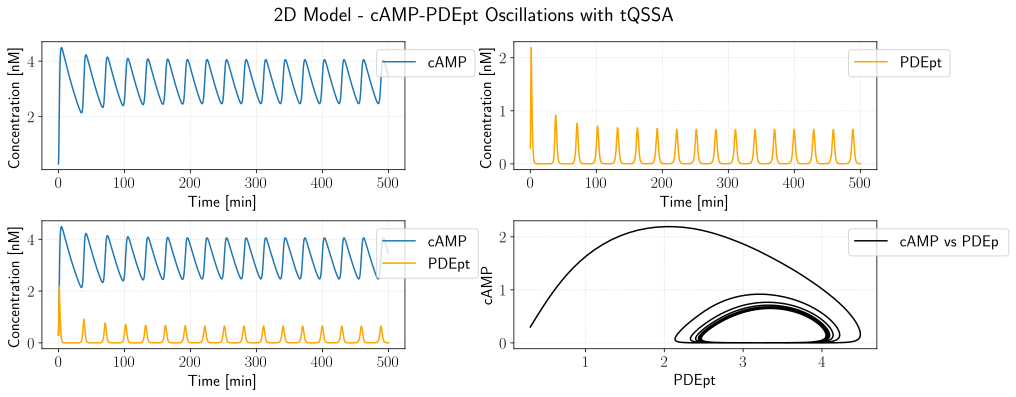

In [10]:
k = 6
W0 = 6.57 #
W1 = 10
k1 = 1.09 /k
k3 = 3.5 /k #or 5.50
k2 = 5.25 /k# was good or 19

r1, r2, r3, r4 =  2.13 / k,  1.62 / k, 0.56 / k, 0.94 / k
Km1, Km2, Km3, Km4 = 1.401430143014302, 5, 5.1, 4.3
Dt =  3.116001600160016
Et = 1.5

x0 = [0.3, 0.3]  # initial conditions
time_interval = [0, 1000]

solver = solve_ivp(cAMP_PDEpt_tQSSA, [0, 500], x0, t_eval=np.linspace(0, 500, 10000), method='RK45')

cAMP, PDEp = solver.y

fig = plt.figure(figsize=(16, 12))
fig.suptitle("2D Model - cAMP-PDEpt Oscillations with tQSSA", fontsize=20, y=0.92)
gs = GridSpec(4, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}

ax0 = fig.add_subplot(gs[0, 0])
ax0.grid(True, linestyle=':', color='lightgray')
ax0.plot(solver.t, PDEp, label='cAMP', color='#1f77b4')
ax0.set_xlabel('Time [min]')
ax0.set_ylabel('Concentration [nM]')
#ax0.set_xlim(0, 50)
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.grid(True, linestyle=':', color='lightgray')
ax1.plot(solver.t, cAMP, label='PDEpt', color='orange')
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Concentration [nM]')
#ax1.set_xlim(0, 50)
ax1.legend(**legend_position, fontsize=16)

ax2 = fig.add_subplot(gs[1, 0])
ax2.grid(True, linestyle=':', color='lightgray')
ax2.plot(solver.t, PDEp, label='cAMP', color='#1f77b4',linestyle='-')#, marker='o', markersize=3, markevery=50)
ax2.plot(solver.t, cAMP, label='PDEpt', color='orange', linestyle='-')#, marker='s', markersize=3, markevery=50)
ax2.set_xlabel('Time [min]')
ax2.set_ylabel('Concentration [nM]')
#ax2.set_xlim(0, 50)
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.grid(True, linestyle=':', color='lightgray')
ax3.plot(PDEp, cAMP, label='cAMP vs PDEp', color='black')
ax3.set_xlabel('PDEpt')
ax3.set_ylabel('cAMP')
ax3.legend(**legend_position, fontsize=16)

fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEplonger.png', dpi=300, bbox_inches='tight')
plt.show()